Mecab について
https://taku910.github.io/mecab/#usage-tools2

In [ ]:
# brew install mecab
# brew install mecab-ipadic
# pip install mecab-python3

In [86]:
#neko.txtをインストール
!wget https://nlp100.github.io/data/neko.txt
 
#形態素解析
!mecab ./neko.txt -o ./neko.txt.mecab

--2023-05-19 18:20:34--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.110.153, 185.199.111.153, 185.199.109.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt.1’

neko.txt.1          100%[===================>] 952.92K  2.66MB/s    in 0.3s    

2023-05-19 18:20:35 (2.66 MB/s) - ‘neko.txt.1’ saved [975789/975789]



In [ ]:
# 30 形態素解析結果の読み込み
""" 
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
"""

result = []
sentence = [] 
 
for lis in open("neko.txt.mecab"):
    l1 = lis.split("\t")
    if len(l1) == 2:
      l2 = l1[1].split(",")
      sentence.append({"surface": l1[0], "base": l2[6], "pos": l2[0], "pos1": l2[1]})
      if l2[1] == "句点":
        result.append(sentence)
        sentence = []
 
result

In [ ]:
# 31 動詞 (表層形)
surface_verb = set()

for lis in result:
  for dic in lis:
    if dic["pos"] == "動詞":
      surface_verb.add(dic["surface"])

print(surface_verb)

In [ ]:
# 32 動詞の基本形
base_verb = set()
 
for lis in result:
  for dic in lis:
    if dic["pos"] == "動詞":
      base_verb.add(dic["base"])
 
print(base_verb)

In [28]:
# 33 「AのB」
a_no_b = set()
 
for lis in result:
  for i in range(len(lis)-2):  #range(len(lis)) list index out of range になる可能性がある
   if lis[i]["pos"] == "名詞" and lis[i + 1]["surface"] == "の" and lis[i + 2]["pos"] == "名詞":
     a_no_b.add(lis[i]["surface"] + lis[i + 1]["surface"] + lis[i + 2]["surface"])
 
print(a_no_b)

{'利の大家', '通例の書生', '吾輩の横腹', '座敷の椽', '叉の上', '沈吟の体', '臘のお話', 'ハリソンの歴史', '西洋の音楽', '彼の脳裏', '鼻の構造', '時分の僕', '人間の用', '僭上の沙汰', '車の音', '当番の時', '卒業の日', '道のため', '立てのフロック', '最前のよう', '中学校の生徒', '彼の日記', '不用意の際', '団扇のよう', '無用のもの', '自分の麺', '鏡花の小説', '師の小説', '裸体の化物', '吾輩の前', '巌のよう', '向の白', '吾輩の柔', '坊主の慣用', '心配の権化', '出版の義', '初対面の挨拶', '腹の痛み', '小間使の癖', 'あばたの体面', '以外のもの', '篇の結び', '格別の事', 'さんの事', '不明の結果', '縄の各部', '静岡の東西', '虎の夢', '食いの隊長', '家の内', '山の中', '諸君の名誉', '機外の機', '蓋の上', '巣鴨の病院', '主人の頭', '人さし指の先', '引窓の代理', '世紀の猫', '先生の草', '自覚の一助', 'ものの胸中', '私の品性', '無地の袴', '紋付の羽織', '竈の影', '鮪の切身', '綿のよう', '記憶の罪', '知の明', '以外の心理', 'ランプの傍', '本の上', '人の苦', '頭の方', '南側の方面', '自分の境遇', '猫のため', '君の言', '前の言', '吾輩の家', '塀のうち', '間男のよう', '硝子の球', '弥生の春', 'さのせりふ', '君の後進', 'あなたの垣根', '君の御蔭', '校舎の一室', '胃のため', '枯菊の茂み', '主人の夢', '燃殻のよう', 'さんの声', '色の口', '吾輩の煙草', '家の門', '涙のよう', '僕の経験', '主人の内', '竈の蓋', '細君の掃除', '金田の鼻', 'いろいろの事', '君の性行', '者の眼', '三の顔', '男子のサンドラ・ベロニ', '頬の上', '浪の下', '自信の念', '相応の炯々', '石の並べ方', '耶蘇教の神', '金田の倉', '庚申山の麓', '病人のよう', '謀叛の連判', 'もの

In [15]:
# 34 名詞の連接
# 名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．
longest_match = []
        
for lis in result:
  noun_conj_list = []
  for dic in lis:
    if dic["pos"] == "名詞":
        noun_conj_list.append(dic['surface'])
    else:
        if len(noun_conj_list) > 1:
            longest_match.append(noun_conj_list)
        noun_conj_list = []

print(longest_match[:10])

[['人間', '中'], ['一番', '獰悪'], ['時', '妙'], ['一', '毛'], ['その後', '猫'], ['一', '度'], ['ぷうぷうと', '煙'], ['邸', '内'], ['三', '毛'], ['書生', '以外']]


In [ ]:
# 35 単語の出現頻度
from collections import Counter

voc = []

for lis in result:
  for dic in lis:
    if dic["surface"] != "":
      voc.append(dic["surface"])

voc_freq = Counter(voc)
voc_freq_sort = voc_freq.most_common()
print(voc_freq_sort)

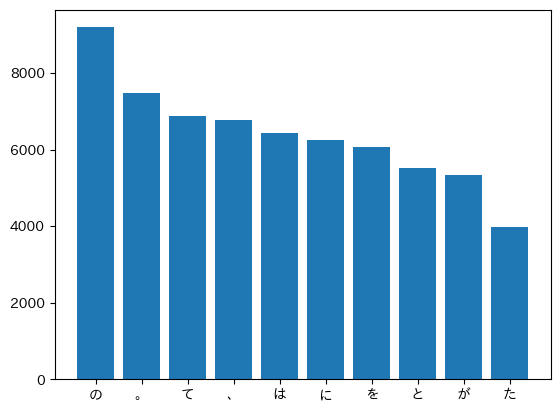

In [9]:
# 36 頻度上位10語
import matplotlib.pyplot as plt
import japanize_matplotlib

#count
word, count = zip(*voc_freq_sort[:10])

#plot
fig, ax = plt.subplots()
ax.bar(word, count)

plt.show()

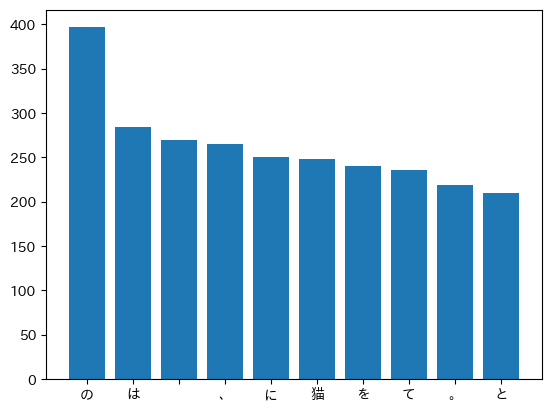

In [10]:
#37 「猫」と共起頻度の高い上位10語
neko_cooccur = []

for lis in result:
  if any(dic["base"] == "猫" for dic in lis):
    for dic in lis:
      neko_cooccur.append(dic["surface"])

#count
count_neko_cooccur = Counter(neko_cooccur)
word, count = zip(*count_neko_cooccur.most_common(10))

#plot
fig, ax = plt.subplots()
ax.bar(word, count)
plt.show()

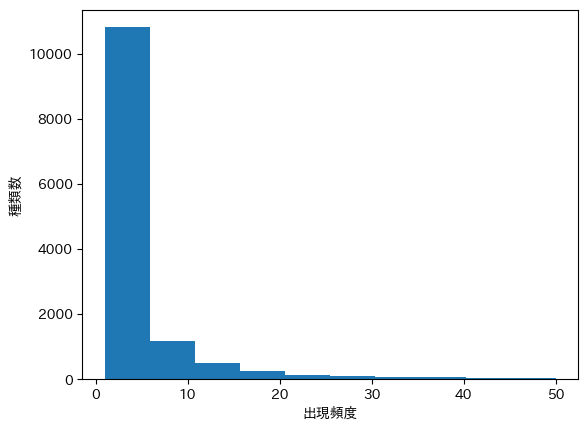

In [26]:
# 38 ヒストグラム
# 横軸は出現頻度(1から単語の出現頻度の最大値まで)
# 縦軸はx軸で示される出現頻度となった単語の異なり数(種類数）

#plot
fig, ax = plt.subplots()
ax.hist(voc_freq.values(), range=(min(voc_freq.values()),50))``
plt.xlabel("出現頻度")
plt.ylabel("種類数")
plt.show()

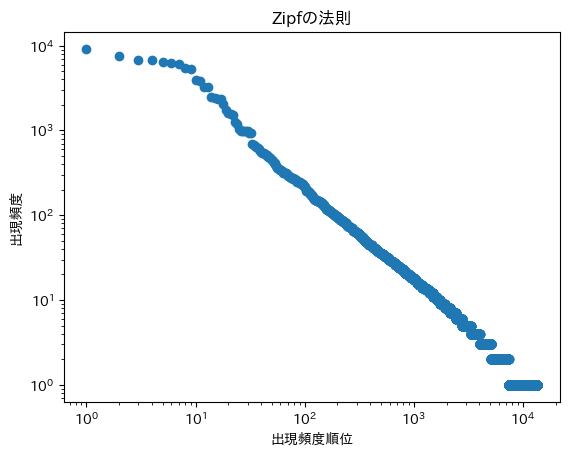

In [97]:
# 39 Zipfの法則
# 単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．
word, count = zip(*voc_freq_sort)

#plot
x = ([i + 1 for i in range(len(count))]) # i:index　順位
y = count
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.xscale("log")
plt.yscale("log")
ax.set_title('Zipfの法則')
ax.set_xlabel('出現頻度順位')
ax.set_ylabel('出現頻度')
plt.show()